## Team :
1. Muhammad Fernanda Naufal Fathoni 
2. Ica Nur Cahyani
3. Tarissa Aura

 Kelas : PYTN-KS-015

Python for Data Science - Kampus Merdeka


# Latar Belakang
    Dataset CC GENERAL adalah data yang berisikan pengguna kartu kredit, Data data tersebut terdiri dari beberapa kolom penggunanya mulai dari ID, Saldo, Pembayaran, tenor dll. Data data tersebut nantinya akan dibuat sebuah clustering berdasarkan prilaku usernya
1. Import Library
2. Import Dataset
3. Data cleaning
4. EDA
5. Preprocessing
6. Model 
7. Model Inference

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Standarisasi data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
%matplotlib inline

#K Means
from sklearn.cluster import KMeans

# Load Data

In [2]:
df = pd.read_csv("CC GENERAL.csv")
#Supaya kolom terdisplay semua
pd.set_option('display.max.columns',60)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Penjelasan Data

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for use

### Melihat informasi isi kolom

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Pada informasi data tersebut didapatkan bahwa berisikan data bertipe data integer, float dan string.


### Melihat jumlah baris dan kolom

In [82]:
df.shape

(8950, 18)

Data tersebut terdiri dari 18 kolom dan 8950 baris

### Melihat Nilai Unique pada setiap kolom

In [83]:
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


### Melihat missing value pada setiap kolom

In [84]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada data tersebut terdapat missing value pada kolom CREDIT_LIMIT berjumlah 1 dan kolom MINIMUM_PAYMENTS berjumlah 313

### Presentase Nilai Null pada Kolom

In [85]:
for col in df.columns:
    jumlah_null = df[col].isnull().sum()
    total = len(df[col])
    presentase = (jumlah_null/total)*100
    
    print(f'Kolom {col}')
    print(f'Jumlah null: {jumlah_null}')
    print(f'Presentase null : {presentase:.2f}%\n')

Kolom CUST_ID
Jumlah null: 0
Presentase null : 0.00%

Kolom BALANCE
Jumlah null: 0
Presentase null : 0.00%

Kolom BALANCE_FREQUENCY
Jumlah null: 0
Presentase null : 0.00%

Kolom PURCHASES
Jumlah null: 0
Presentase null : 0.00%

Kolom ONEOFF_PURCHASES
Jumlah null: 0
Presentase null : 0.00%

Kolom INSTALLMENTS_PURCHASES
Jumlah null: 0
Presentase null : 0.00%

Kolom CASH_ADVANCE
Jumlah null: 0
Presentase null : 0.00%

Kolom PURCHASES_FREQUENCY
Jumlah null: 0
Presentase null : 0.00%

Kolom ONEOFF_PURCHASES_FREQUENCY
Jumlah null: 0
Presentase null : 0.00%

Kolom PURCHASES_INSTALLMENTS_FREQUENCY
Jumlah null: 0
Presentase null : 0.00%

Kolom CASH_ADVANCE_FREQUENCY
Jumlah null: 0
Presentase null : 0.00%

Kolom CASH_ADVANCE_TRX
Jumlah null: 0
Presentase null : 0.00%

Kolom PURCHASES_TRX
Jumlah null: 0
Presentase null : 0.00%

Kolom CREDIT_LIMIT
Jumlah null: 1
Presentase null : 0.01%

Kolom PAYMENTS
Jumlah null: 0
Presentase null : 0.00%

Kolom MINIMUM_PAYMENTS
Jumlah null: 313
Presentase null :

### Cek Data Duplikat

In [86]:
df.duplicated().sum()

0

### Describe Data

In [87]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# DATA CLEANING

In [88]:
data_cleaning = df.copy()

In [89]:
data_cleaning.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Drop Missing Value Pada kolom CREDIT_LIMIT

In [90]:
data_cleaning = data_cleaning[data_cleaning['CREDIT_LIMIT'].notna()] 
data_cleaning.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [91]:
data_cleaning.shape

(8949, 18)

### Isi Missing Value dengan nilai MEAN pada Kolom MINIMUM_PAYMENT

In [92]:
data_cleaning['MINIMUM_PAYMENTS'] = data_cleaning['MINIMUM_PAYMENTS'].fillna(data_cleaning['MINIMUM_PAYMENTS'].mean())
data_cleaning.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Drop Kolom CUST_ID
drop kolom cust id karena itu termasuk id pengguna dan tidak memberikan dampak pada model

In [93]:
data_cleaning.drop('CUST_ID', axis = 1 , inplace=True)

# Exploratory Data Analysis

### Data Korelasi

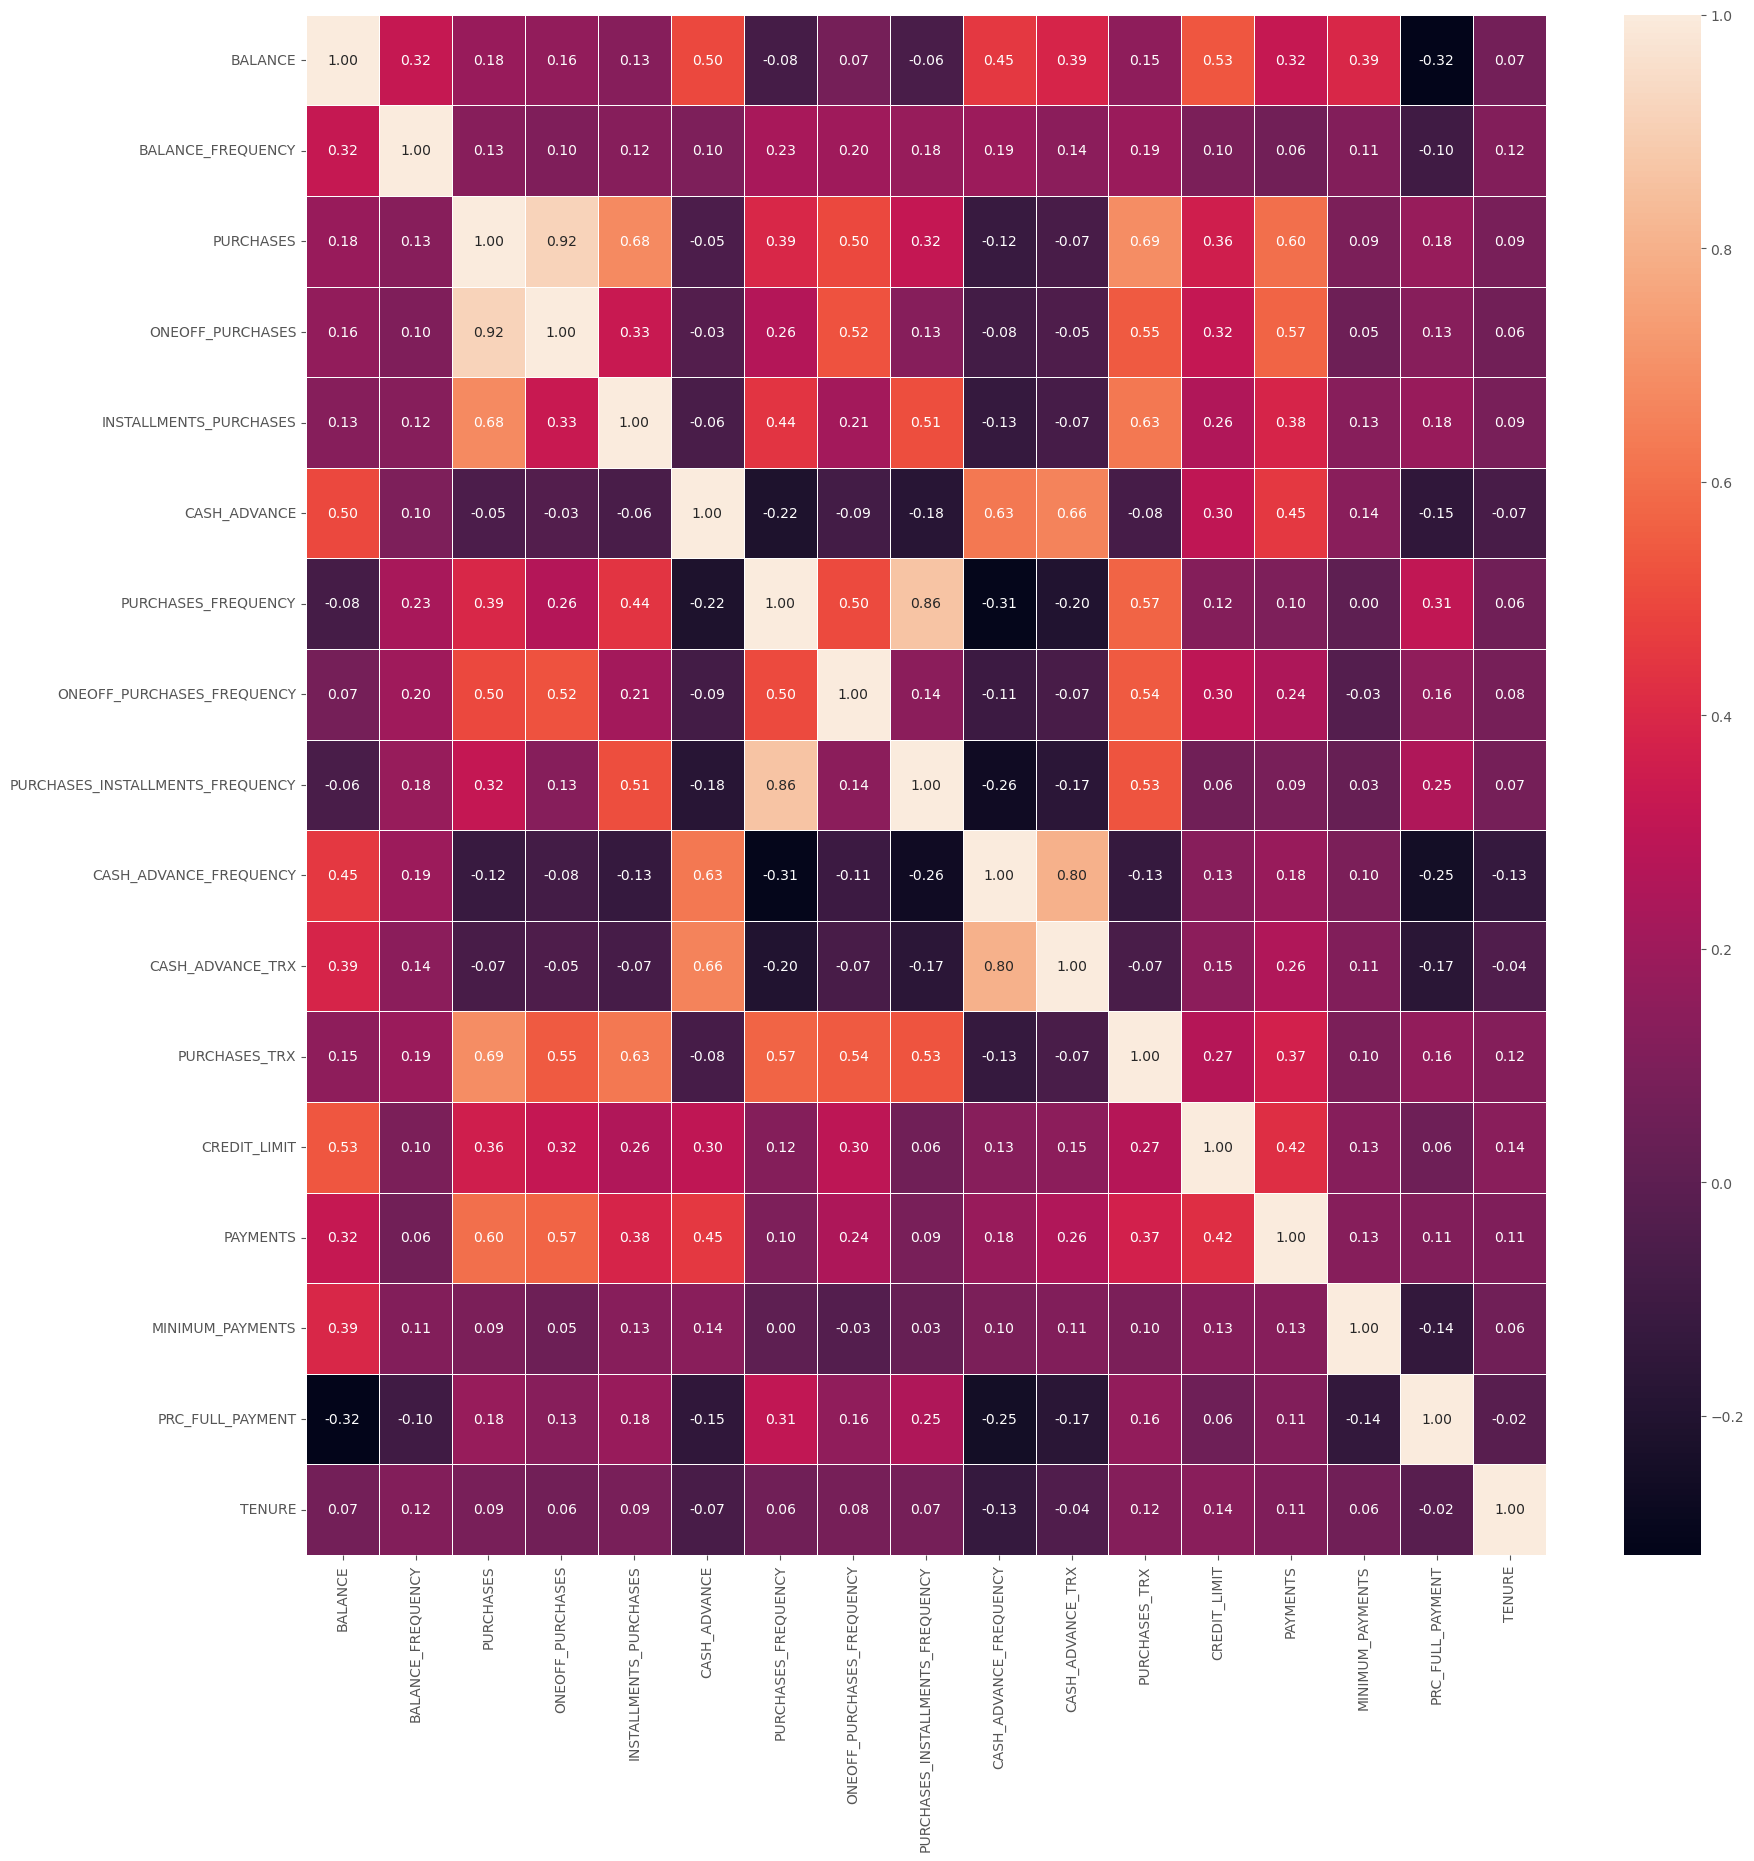

In [94]:
# Mengecek matrix korealsi kembali
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(data_cleaning.corr(), linewidths = .5, annot=True, fmt='.2f')

### Cek data outlier

In [95]:
# For Observation only (Unidimensional Outliers)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10160\3892624348.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10160\3892624348.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10160\3892624348.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()


BALANCE                              695
BALANCE_FREQUENCY                   1493
CASH_ADVANCE                        1030
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
CREDIT_LIMIT                         248
CUST_ID                                0
INSTALLMENTS_PURCHASES               867
MINIMUM_PAYMENTS                     841
ONEOFF_PURCHASES                    1013
ONEOFF_PURCHASES_FREQUENCY           782
PAYMENTS                             808
PRC_FULL_PAYMENT                    1474
PURCHASES                            808
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_TRX                        766
TENURE                              1366
dtype: int64

## Melihat Sebaran Data

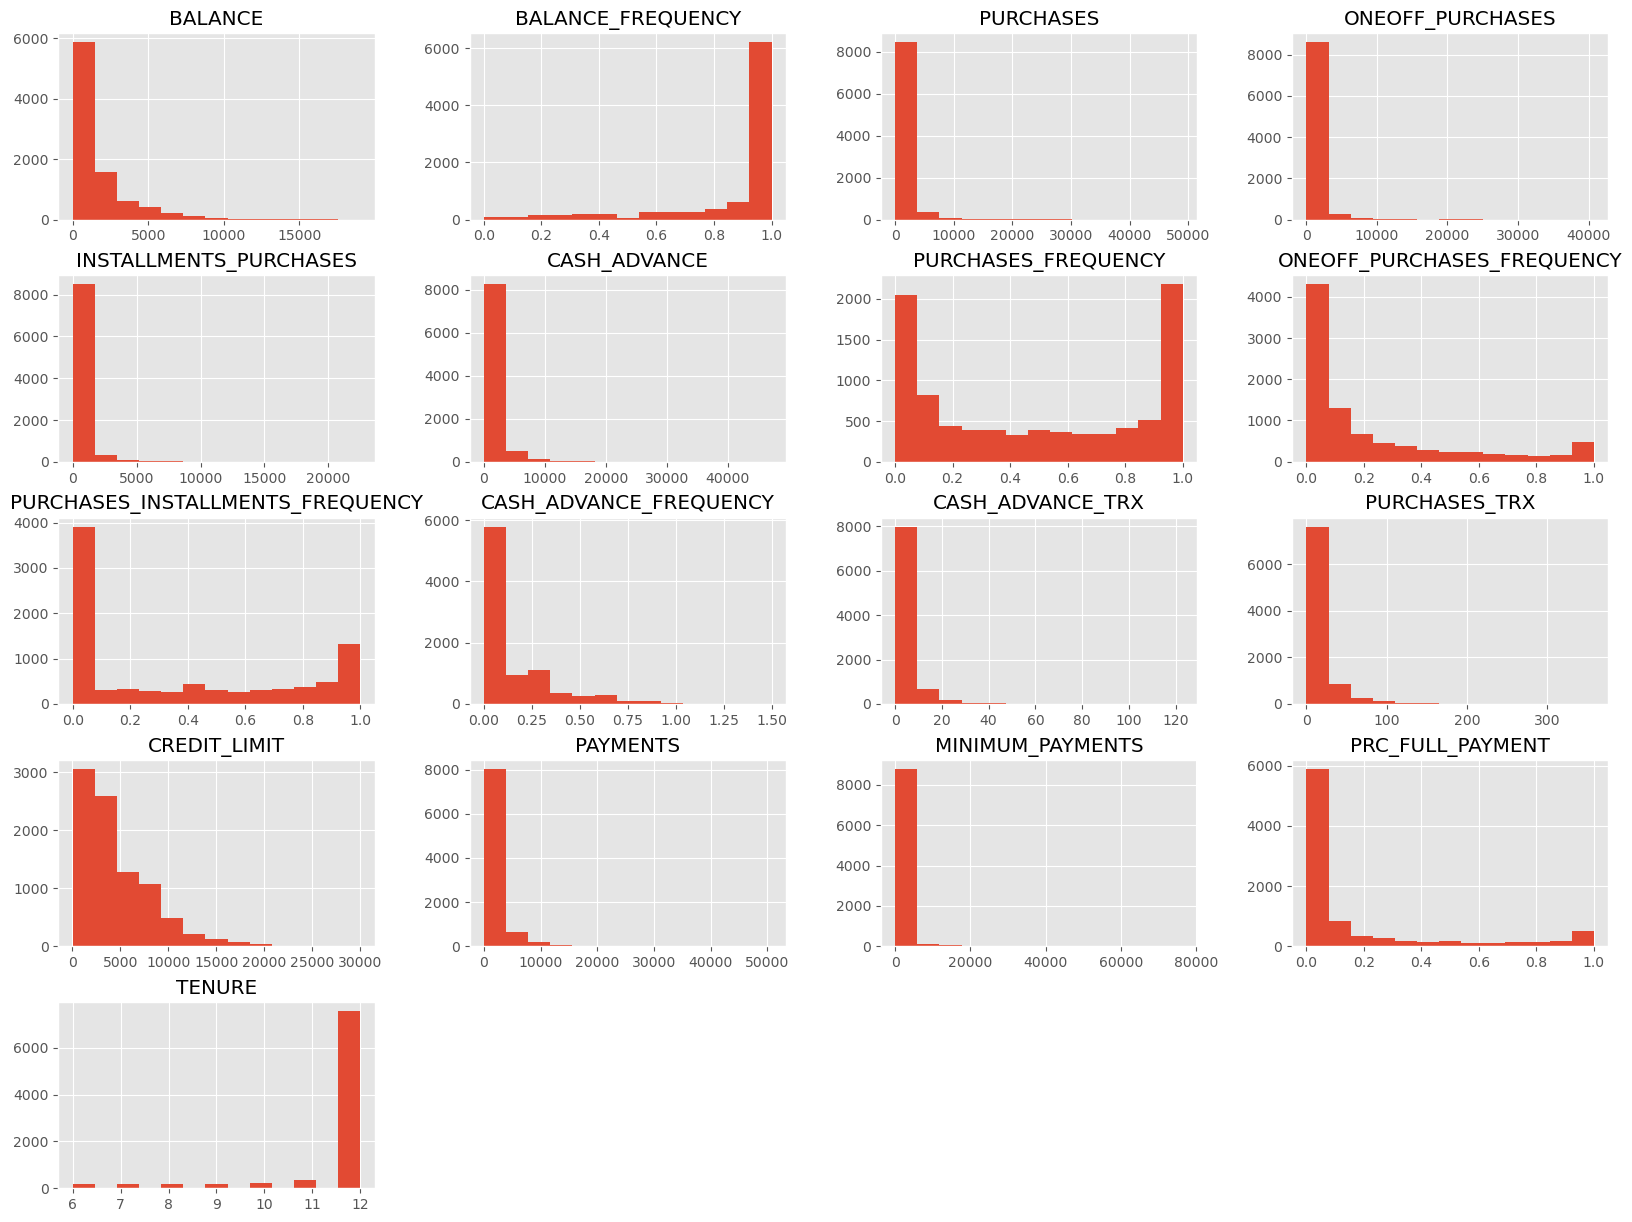

In [96]:
data_cleaning.hist(bins=13, figsize=(20,15), layout=(5,4));

Text(0.5, 1.0, 'Korelasi Data Frequensi pembayaran Dengan Balance')

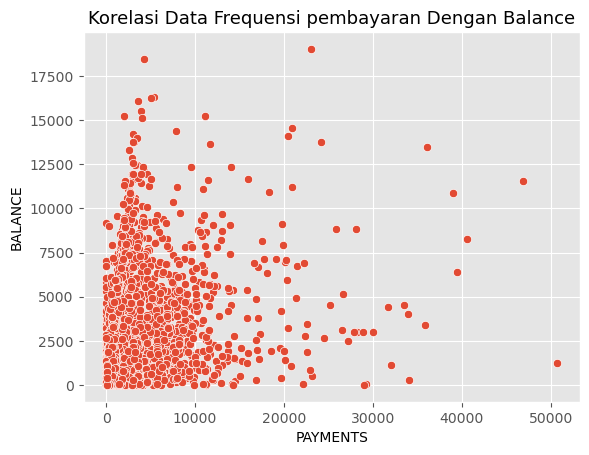

In [97]:
sns.scatterplot(x="PAYMENTS", y="BALANCE", data=df)
plt.title("Korelasi Data Frequensi pembayaran Dengan Balance", fontsize= 13)

In [98]:
#dfPair=df[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
#sns.pairplot(dfPair)

# DATA PROCESSING

In [99]:
data_cleaning.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Standarisasi

In [100]:
# Standardize data
scaler = StandardScaler() 
data_standart = scaler.fit_transform(data_cleaning.values)
data_standart.shape

(8949, 17)

# K Means

In [101]:
#(menggunakan Elbow Method)
wcss = [] # wcss -> Within Cluster Sum of Squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(data_cleaning)
    wcss.append(kmeans.inertia_)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_k

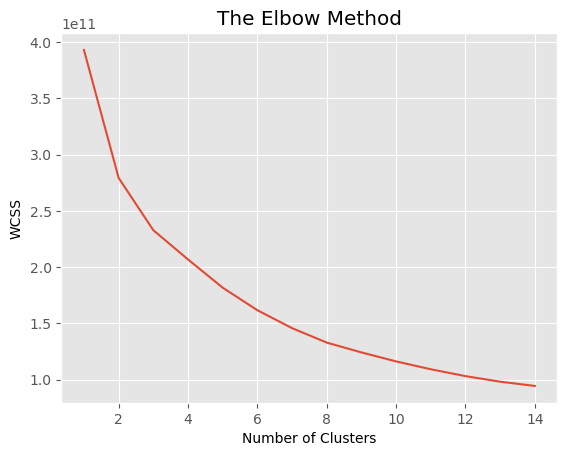

In [102]:
# Cara lain (menggunakan Elbow Method)
plt.plot(range(1, 15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [103]:
x = data_cleaning.values

In [104]:
# Mendefinisikan model kmeans dengan jumlah cluster sebanyak 5
kmean = KMeans(n_clusters = 3,init ="k-means++", max_iter=300,random_state=35)
y_kmeans = kmean.fit_predict(x)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [105]:
y_kmeans

array([1, 0, 0, ..., 1, 1, 1])

In [106]:
df_kmean= data_cleaning.copy()
df_kmean['KMeansSegment']= kmean.labels_

In [107]:
df_kmean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.304943,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [108]:
kmean.cluster_centers_

array([[3.40376262e+03, 9.40682630e-01, 1.58759398e+03, 9.93727440e+02,
        5.94179864e+02, 2.12286857e+03, 5.40018242e-01, 3.17734975e-01,
        3.85134208e-01, 2.10880187e-01, 5.75142232e+00, 2.21785558e+01,
        9.01652278e+03, 2.90647061e+03, 1.56745118e+03, 1.34188951e-01,
        1.17382932e+01],
       [8.56288277e+02, 8.54527663e-01, 6.04288535e+02, 3.12379599e+02,
        2.92207173e+02, 4.95893221e+02, 4.67843072e-01, 1.54274906e-01,
        3.52486472e-01, 1.06835397e-01, 2.25558616e+00, 1.06778390e+01,
        2.75444193e+03, 9.97103938e+02, 5.85566068e+02, 1.56970113e-01,
        1.14344965e+01],
       [4.84189326e+03, 9.11252077e-01, 1.07893056e+04, 7.61968438e+03,
        3.16979046e+03, 5.15222013e+03, 7.52377608e-01, 5.99535492e-01,
        6.04122562e-01, 2.26540108e-01, 9.20000000e+00, 8.62000000e+01,
        1.24657692e+04, 1.81174305e+04, 2.51500229e+03, 3.34474108e-01,
        1.18384615e+01]])

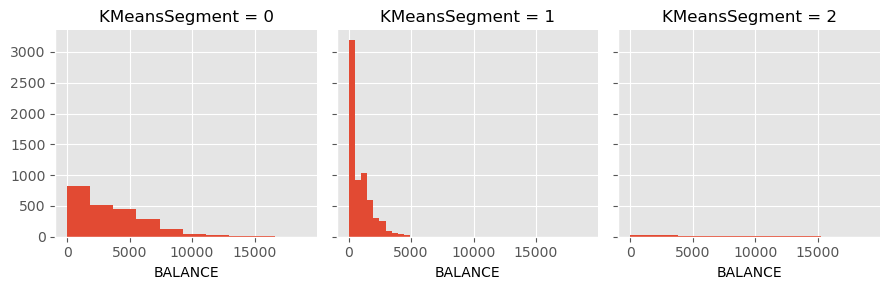

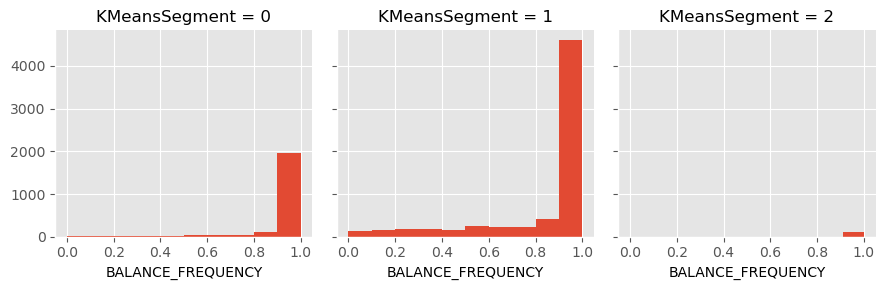

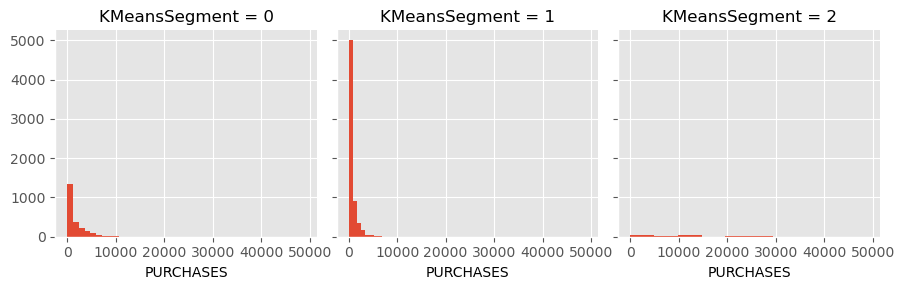

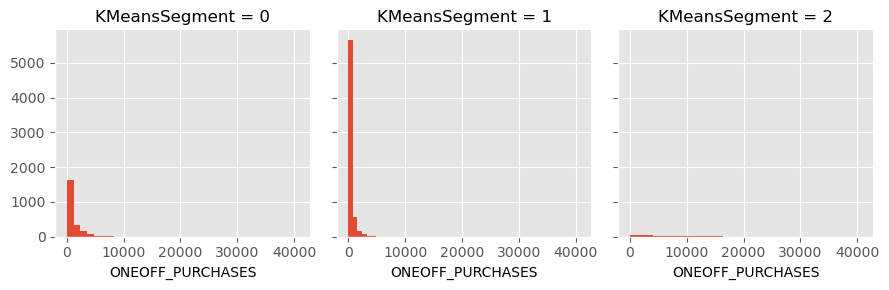

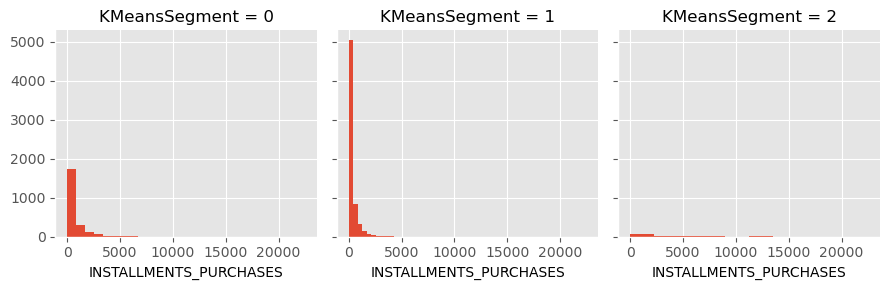

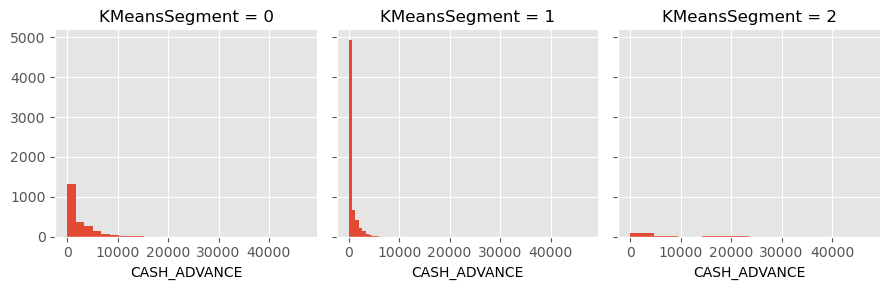

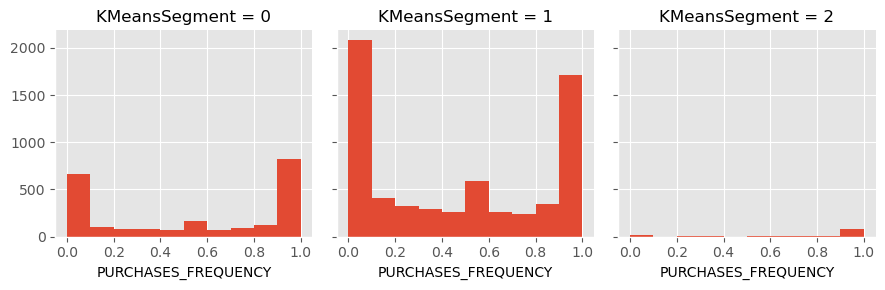

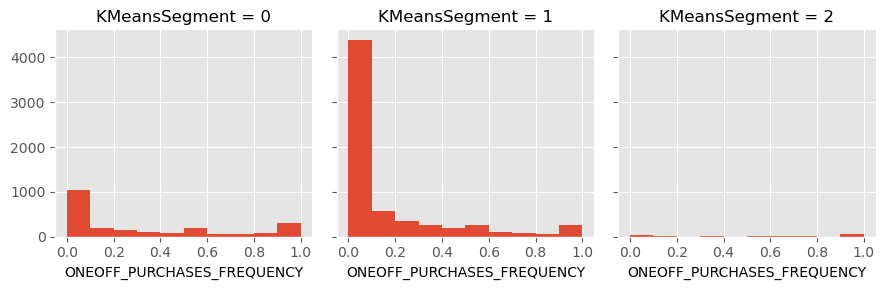

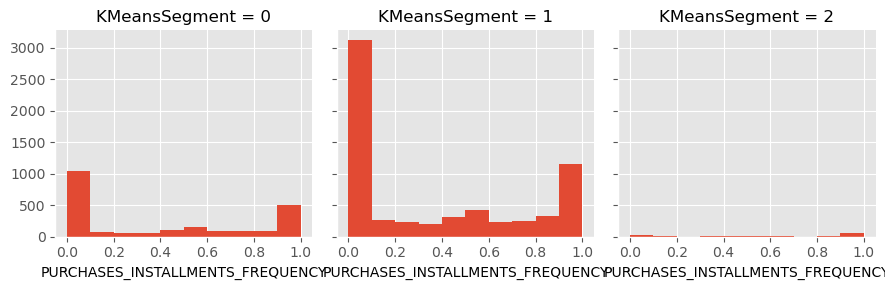

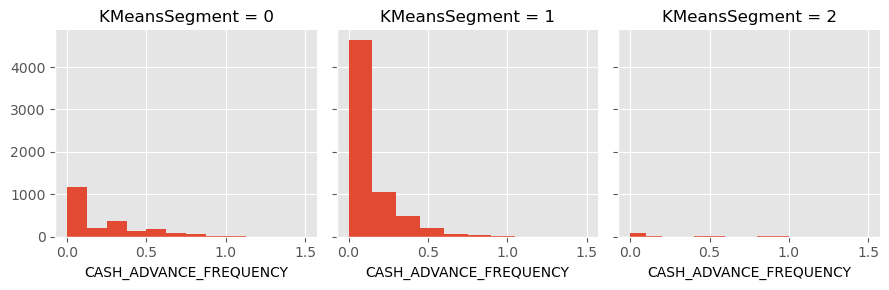

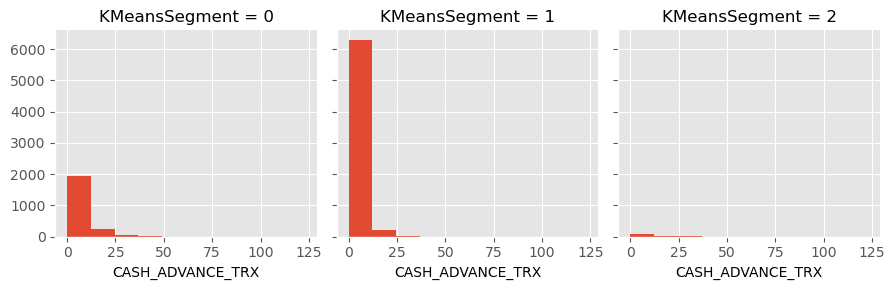

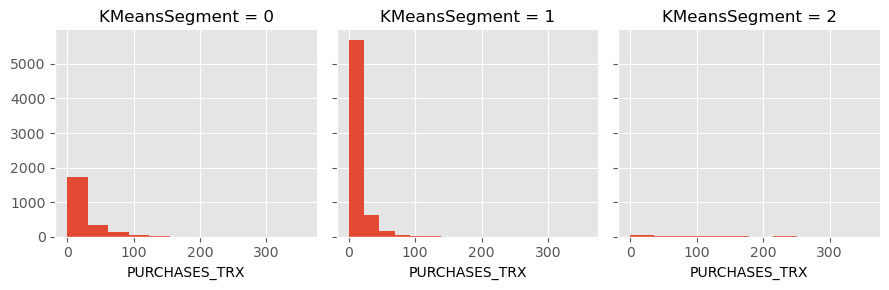

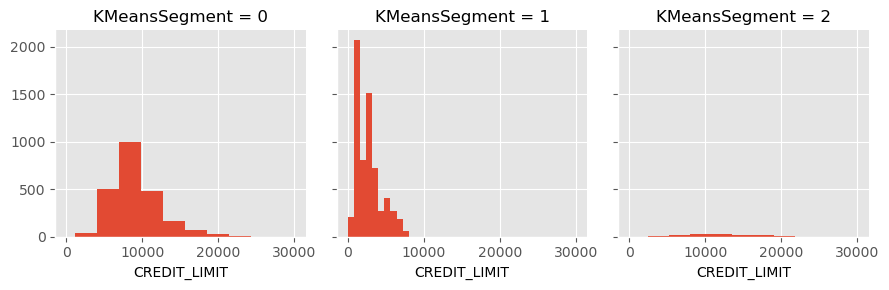

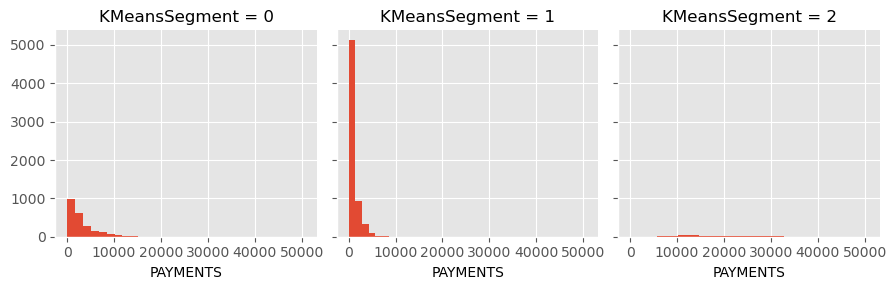

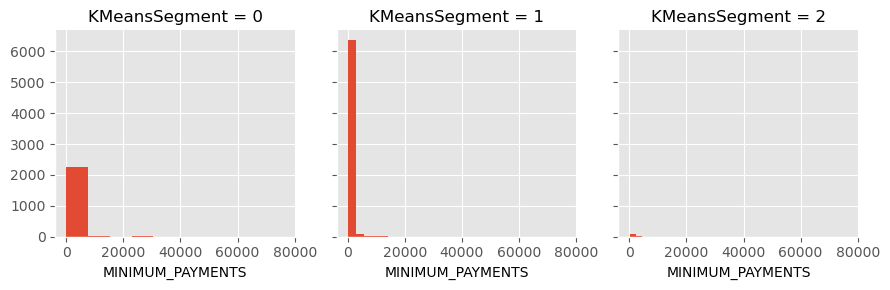

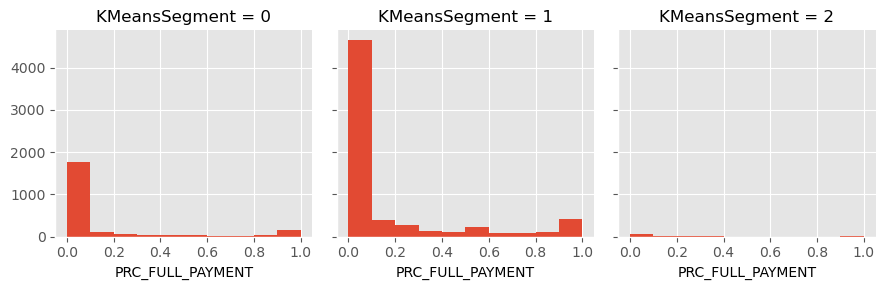

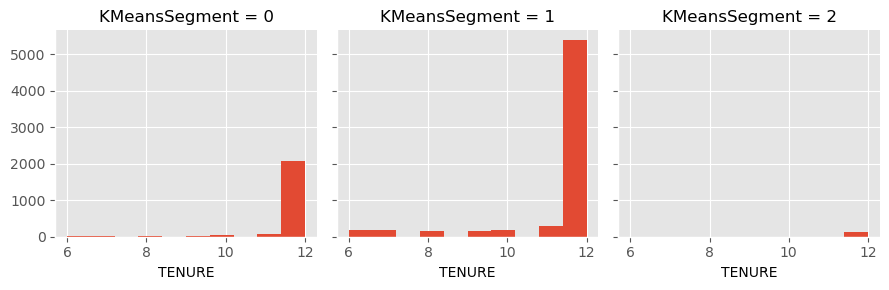

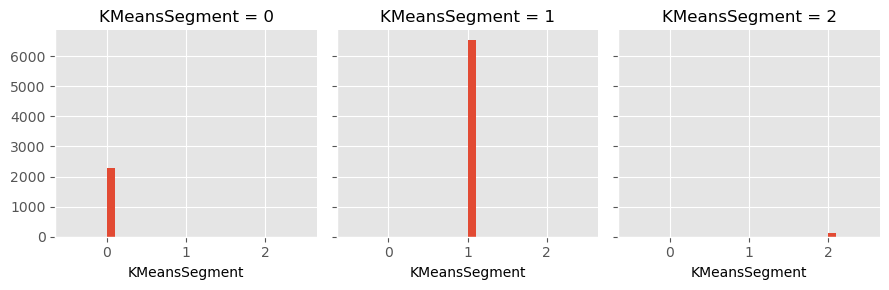

In [109]:
for c in df_kmean:
    grid= sns.FacetGrid(df_kmean, col='KMeansSegment')
    grid.map(plt.hist, c)

## PCA

In [110]:
# Mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components
# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(data_standart)
pca_data = pd.DataFrame(data=components,
                        columns=["Component 1", "Component 2"])

In [111]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 2 Component= ", sum(pca.explained_variance_ratio_))

[0.27287776 0.20302663]
Total informasi dari 2 Component=  0.4759043945839605


In [112]:
df_pca = pd.concat([pca_data,df_kmean.KMeansSegment], axis = 1)
df_pca.head(10)

,Component 1,Component 2,KMeansSegment
0,-1.682358,-1.076718,1.0
1,-1.138962,2.506115,0.0
2,0.969351,-0.383443,0.0
3,-0.873814,0.042933,0.0
4,-1.599678,-0.688767,1.0
5,0.250977,-0.780089,1.0
6,6.352702,-0.691642,0.0
7,0.276837,-1.290786,1.0
8,-0.441992,-0.461906,1.0
9,-0.562571,-0.366563,0.0


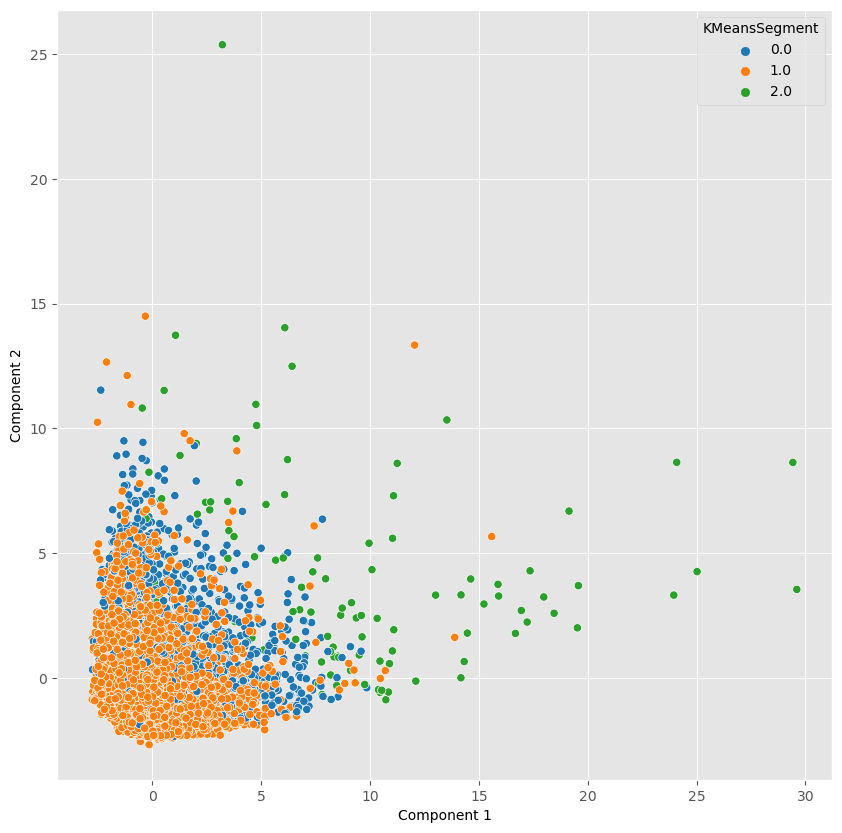

In [113]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="Component 1", y="Component 2", hue = "KMeansSegment", data = df_pca , palette='tab10')
plt.show()

- Cluster 0 / Biru : Balance terisi namun jumlah payments yang dilakukan oleh akun tersebut jarang
- Cluster 1 / Orange : Balance jarang terisi dan akun tersebut melakukan payments sangat jarang
- Cluster 2 / Hijau : Balance sering diisi dan sering melakukan payments

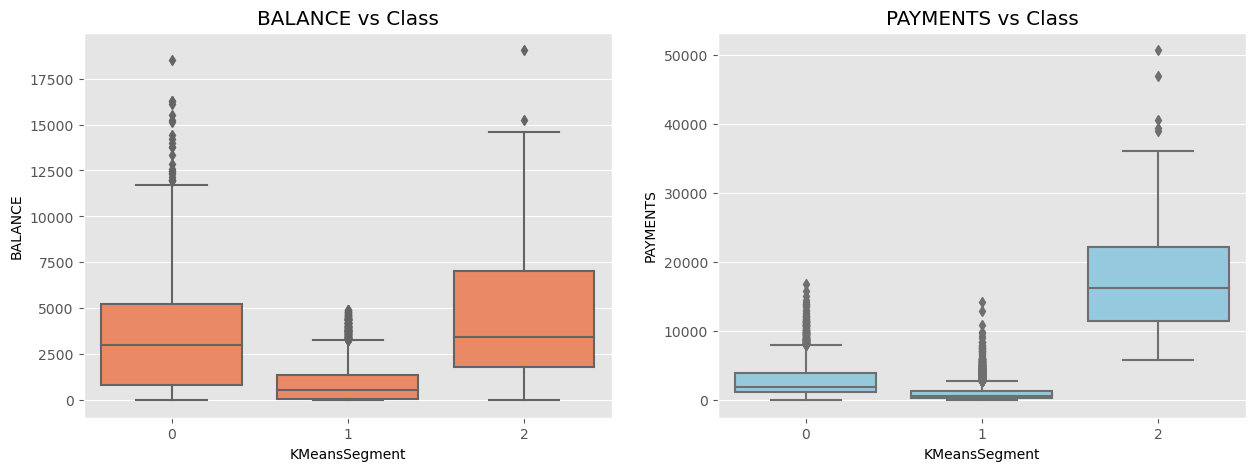

In [114]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "KMeansSegment", y = "BALANCE", data  = df_kmean, color = "coral");
plt.title("BALANCE vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = "KMeansSegment", y = "PAYMENTS", data  = df_kmean, color = "skyblue");
plt.title("PAYMENTS vs Class")

plt.show()

- Cluster 0 : Balance terisi namun jumlah payments yang dilakukan oleh akun tersebut jarang
- Cluster 1 : Balance jarang terisi dan akun tersebut melakukan payments sangat jarang
- Cluster 2 : Balance sering diisi dan sering melakukan payments

# Model Inference

In [115]:
balance=400
balance_freq=1
purchases=200
oneoff_purchases=0
installments_purchases=90.5
cash_advance=0
purchases_freq=0.333
oneoff_purchases_freq=0.12
purchases_installments=0.5
cash_adv_freq=0
cash_adv_trx=0
purchase_trx=3
credit_limit=1000
payments=80
min_payments=135
prc_full_pay=0
tenure=10

feature=[balance,balance_freq,purchases, oneoff_purchases, installments_purchases,cash_advance,purchases_freq,
         oneoff_purchases_freq,purchases_installments,cash_adv_freq,cash_adv_trx,purchase_trx,credit_limit,payments,min_payments,
         prc_full_pay,tenure]

feature=scaler.transform([feature])

feature.reshape(17,)

print(feature)

predict=kmean.predict(feature)

[[-0.5595319   0.51798018 -0.37597761 -0.35695651 -0.35453253 -0.4668054
  -0.39220215 -0.27647489  0.3409965  -0.67529446 -0.47608293 -0.47115096
  -0.96037969 -0.57109944 -0.31292976 -0.52558844 -1.13527881]]


In [116]:

if predict == 0:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 0 : Balance terisi namun jumlah payments yang dilakukan oleh akun tersebut jarang')
elif predict == 1:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 1 : Balance jarang terisi dan akun tersebut melakukan payments sangat jarang')
elif predict == 2:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 2 : Balance sering diisi dan sering melakukan payments')

Berdasarkan analisa, pengguna masuk ke dalam cluster 1 : Balance jarang terisi dan akun tersebut melakukan payments sangat jarang


# Kesimpulan
Berdasarkan hasil clustering dibagi menjadi 3 yaitu cluster 0 1 dan 2. Cluster 0 berisikan pengguna dengan balance terisi namun payment jarang. Cluster 1 berisikan balance jarang terisi namun akun tersebut jarang melakukan payment. dan cluster 3 berisikan balance sering diisi dan sering melakukan payment. 